In [1]:
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. 
 
Here is the code to load the data: 
 

In [1]:
import numpy as np 
 
import pandas as pd 
 
import scipy.stats as stats 
 
import matplotlib.pyplot as plt 
import seaborn as sns
 
import sklearn 
 
from sklearn.datasets import load_boston 
 
boston = load_boston() 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
bostondata=pd.read_csv("Boston.csv")

In [3]:
bostondata.head() #there is unnamed column ,which is not of any use in regression analysis so need to remove it 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
bostondata.drop(bostondata.columns[bostondata.columns.str.contains('unnamed',case=False)],
          axis=1, inplace=True)


In [5]:
bostondata

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
bostondata.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
bostondata.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
bostondata.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
bostondata.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [10]:
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
#Exploratory data analysis :

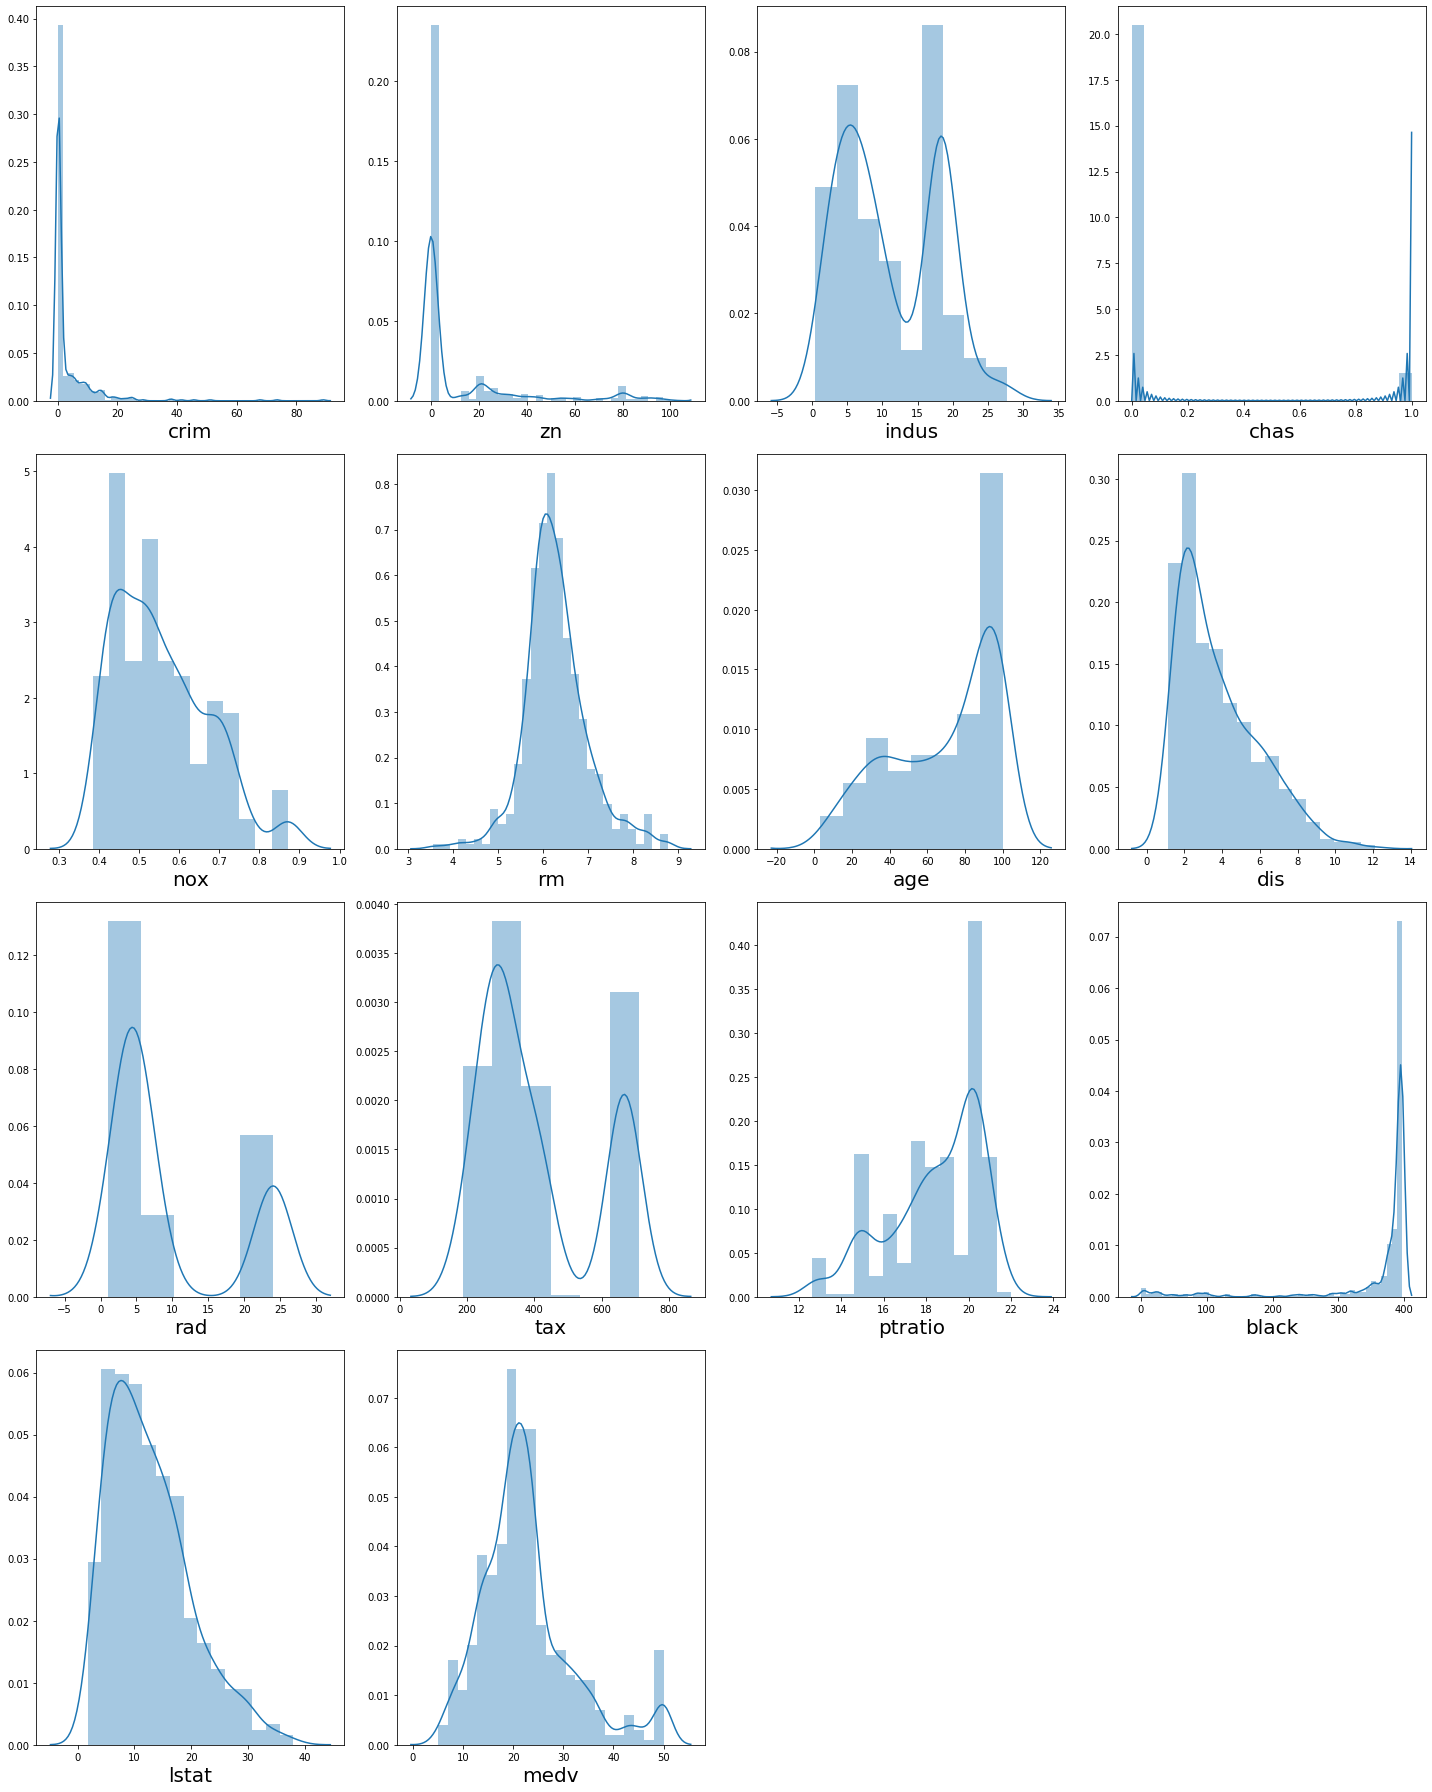

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bostondata:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bostondata[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
y = bostondata['medv']
X =bostondata.drop(columns = ['medv'])

In [27]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [29]:
#lets's observe the relationship between independent variables and dependent variable

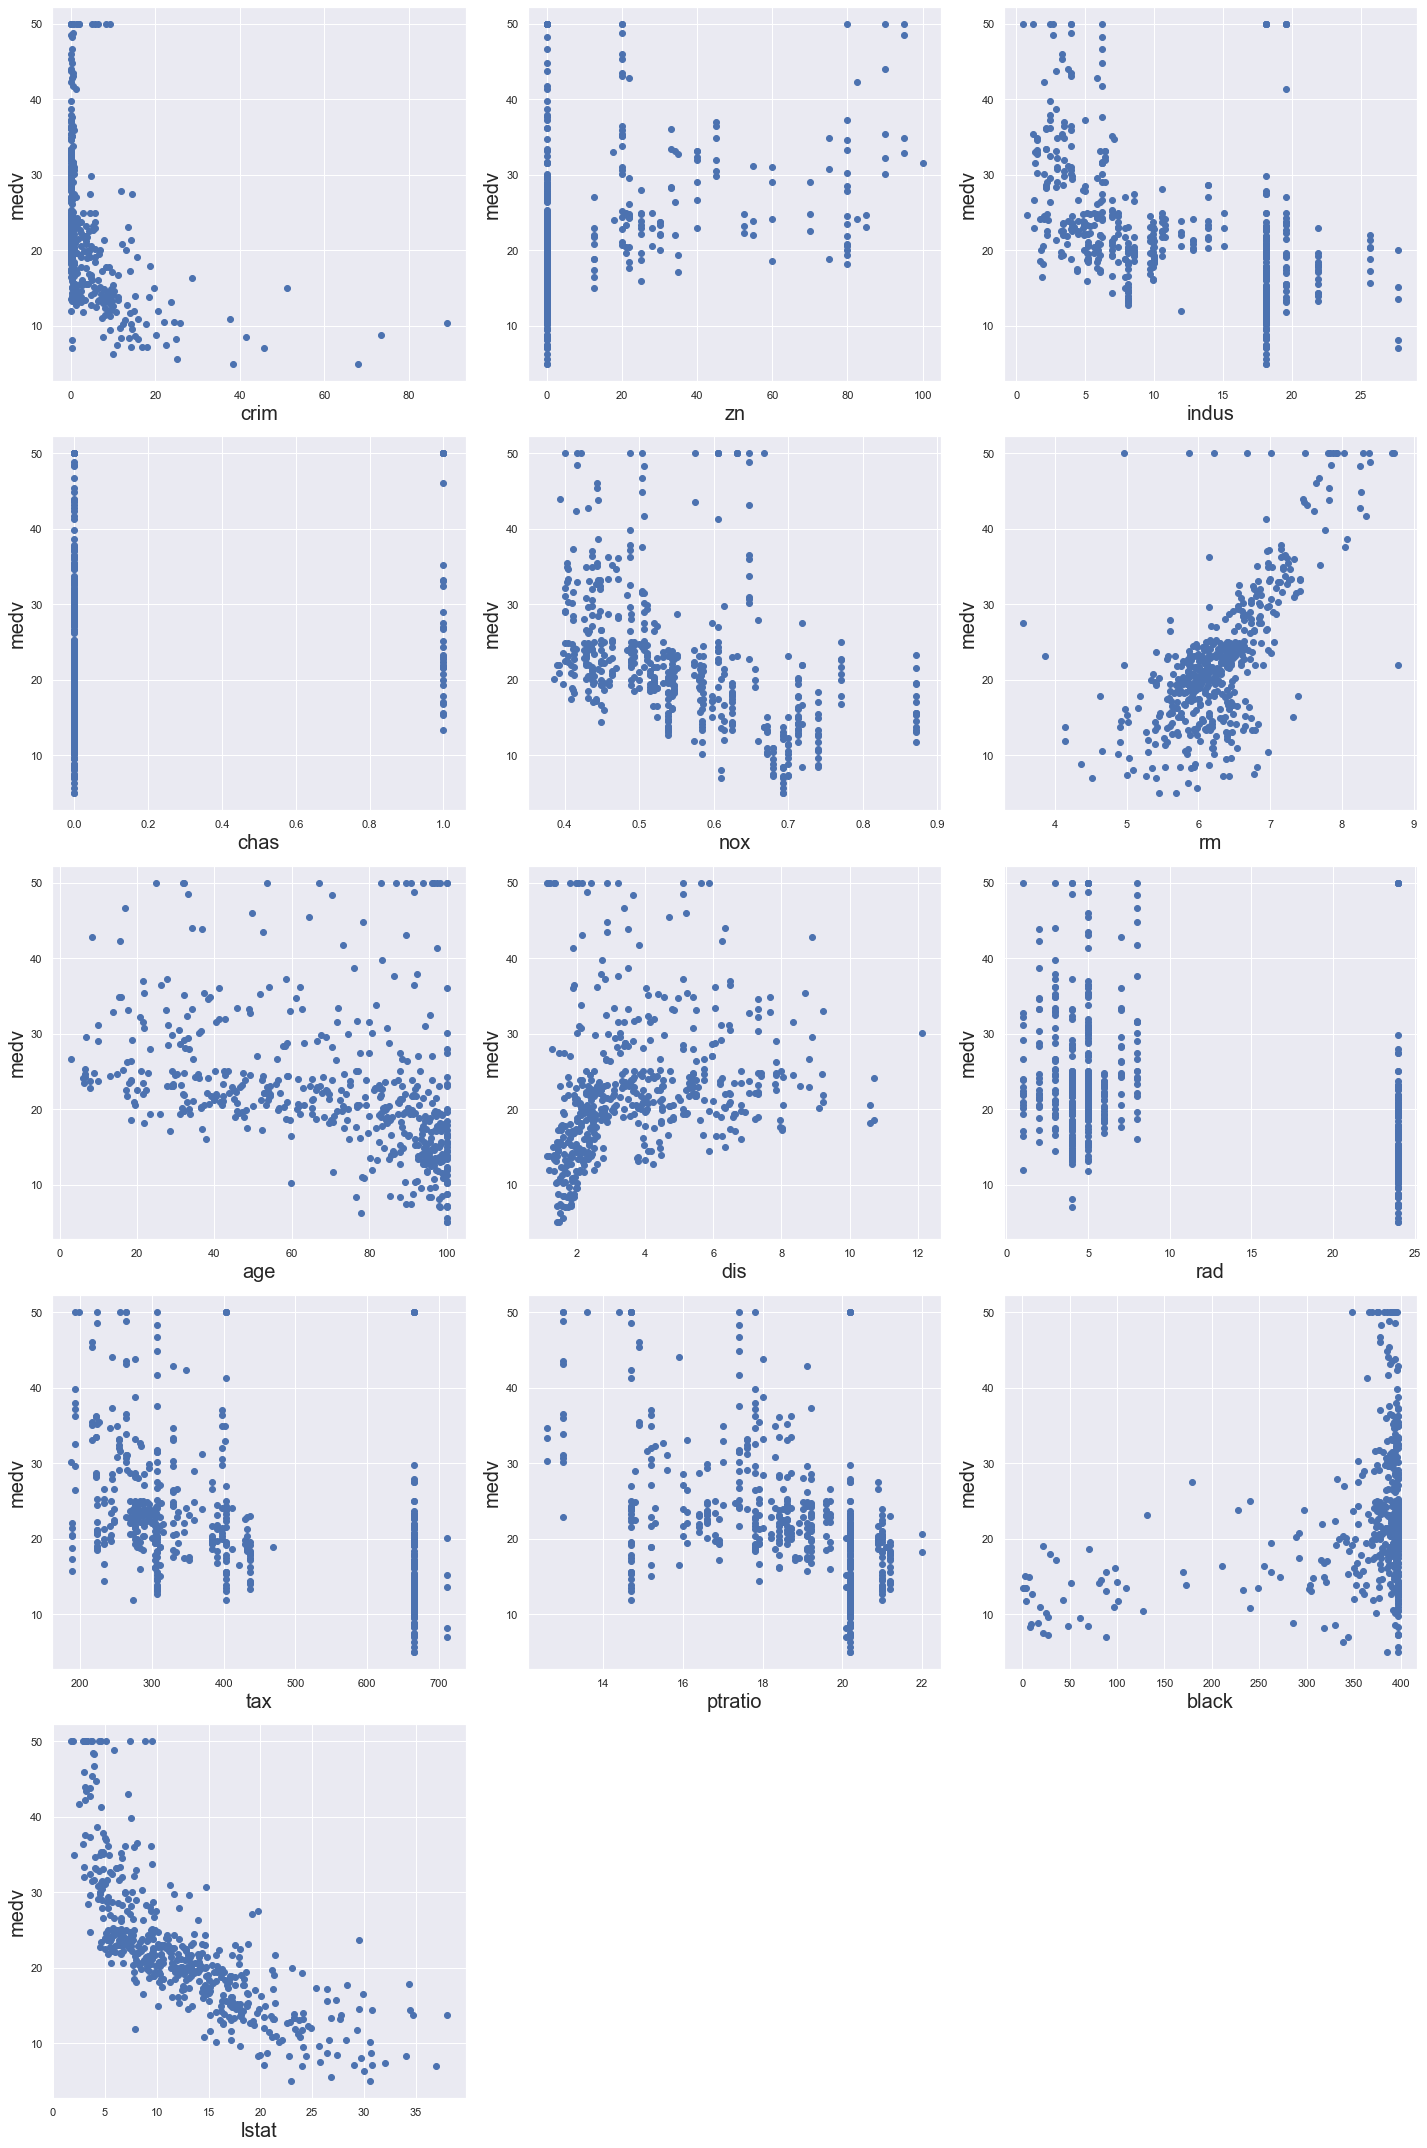

In [30]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
for column in X:
    if plotnumber<=15 : 
        
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('medv',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
# or for EDA  instead of these abovegraph, we can use pairplot,distplot and heatmap to see corelation 

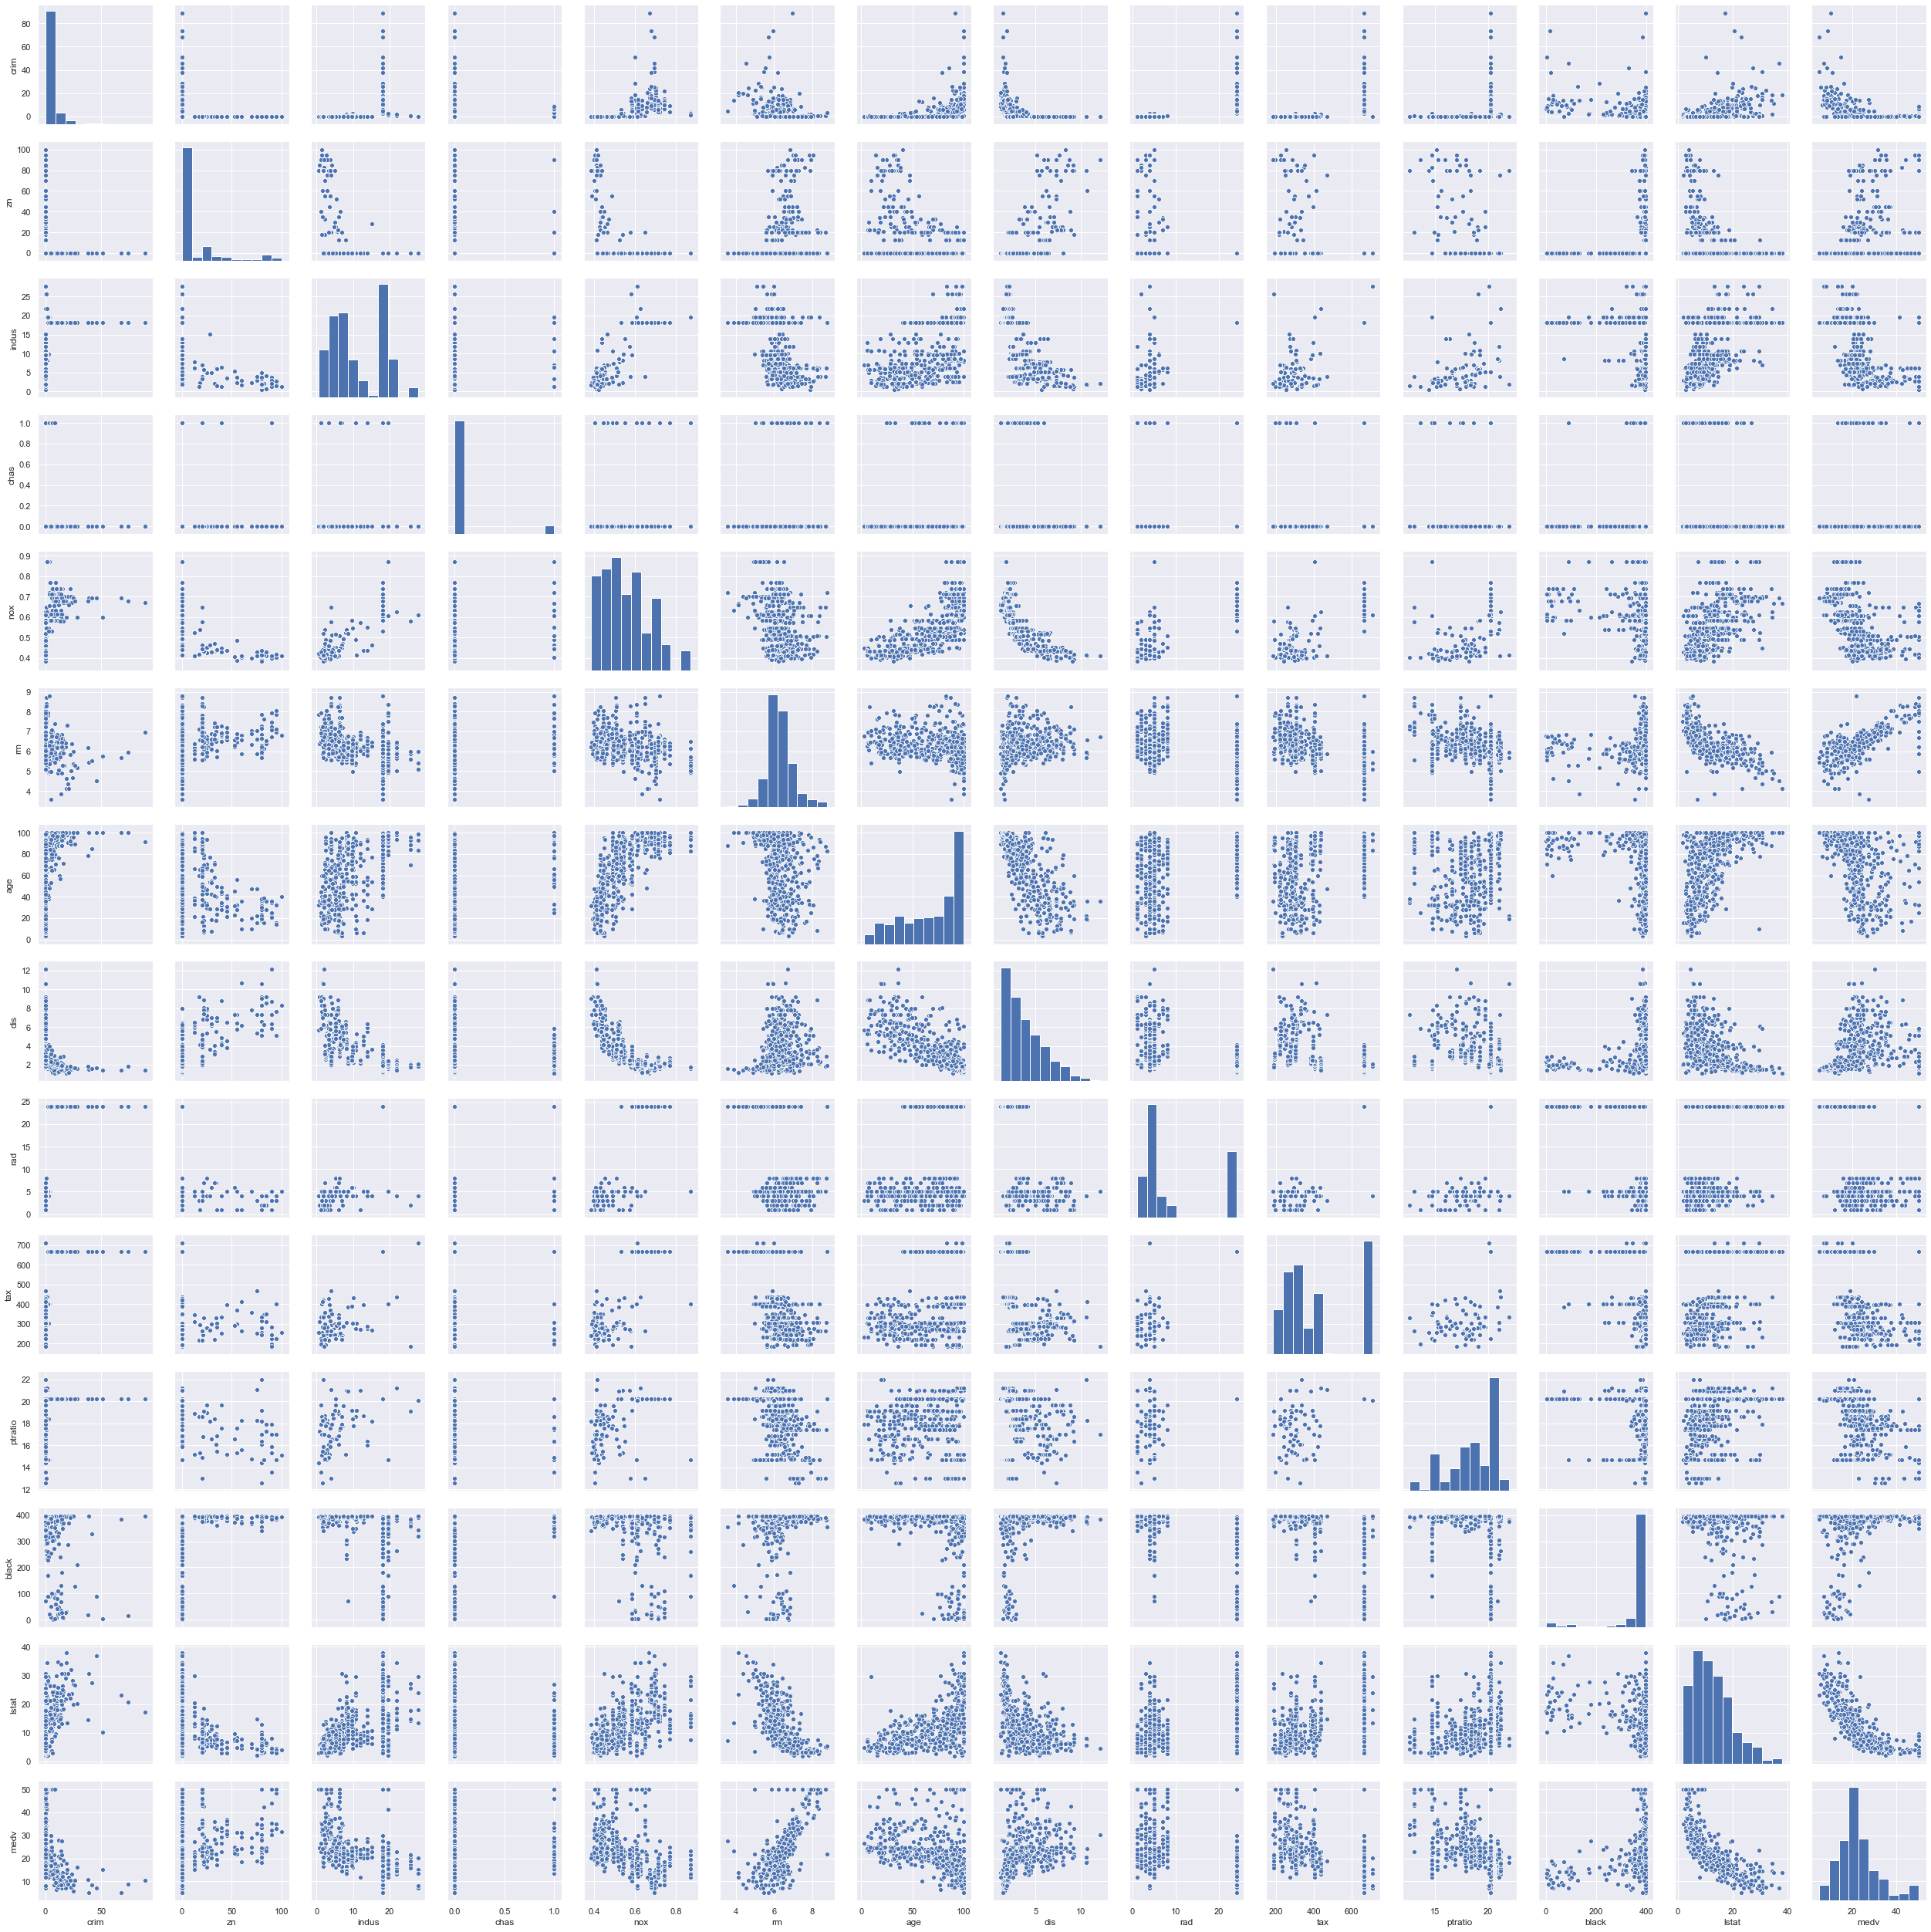

In [32]:
sns.pairplot(bostondata)

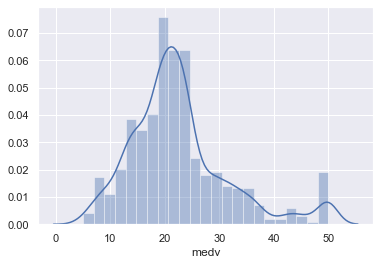

In [33]:
sns.distplot(bostondata['medv'])  #from this distplot we can say that the medv i.e price of houses 
                                  #is distributed normaly with some outliers.

In [34]:
bostondata.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


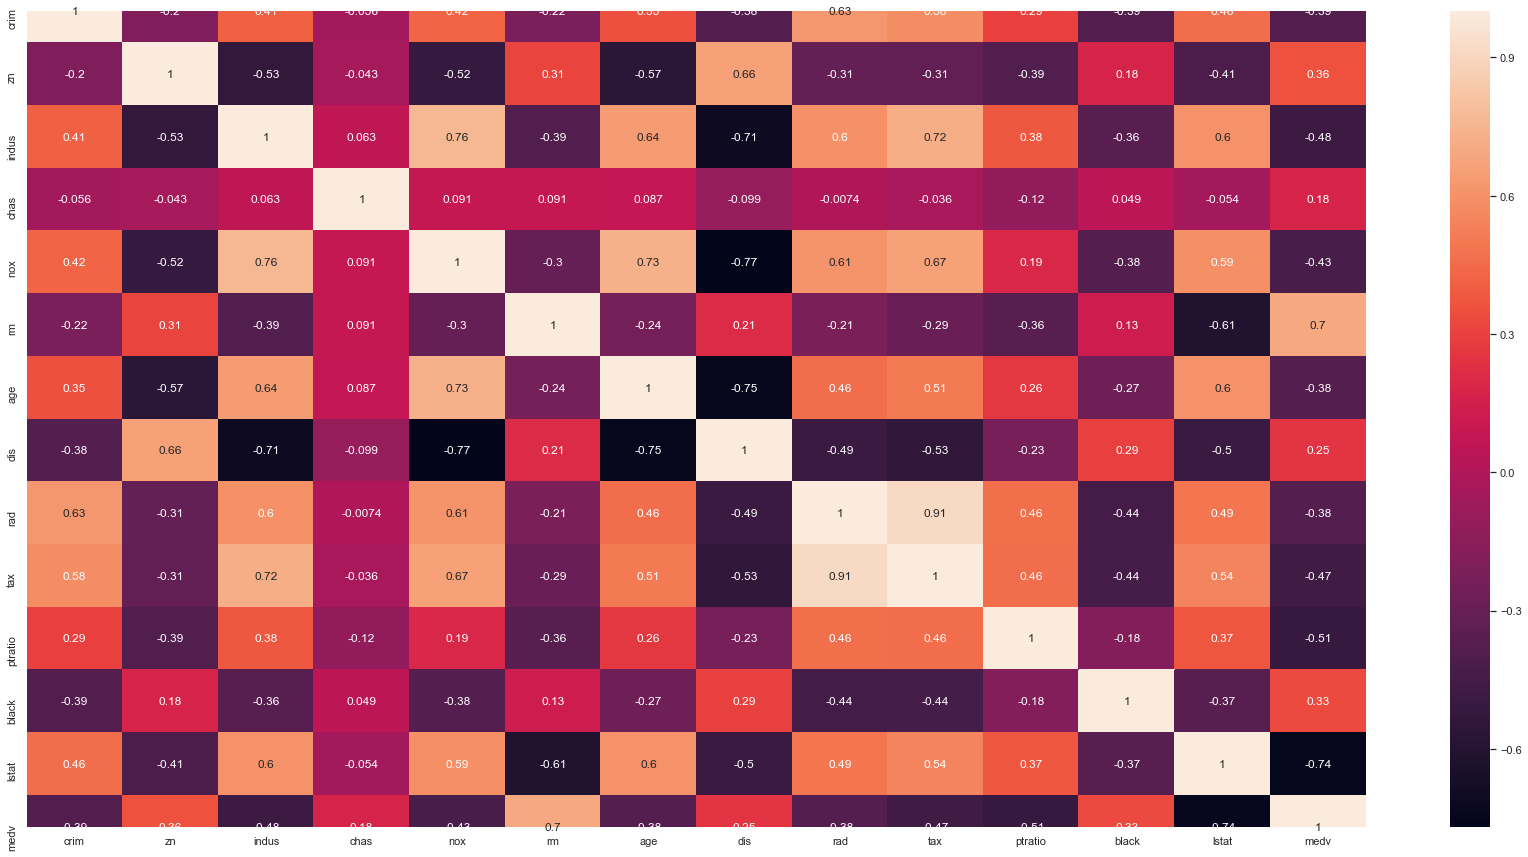

In [45]:
plt.figure(figsize=(30,15))
sns.heatmap(bostondata.corr(),annot=True)

In [ ]:
""" from correlation matrix :crim,zn,indus,chas,nox,age ,dis,rad,tax,black have vwry strong correlation amongst each other,
we should not consider these features together for training our model."""

In [35]:
#Let's move ahead and check for multicollinearity.

In [36]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [39]:
vif

,VIF,Features
0,1.792192,crim
1,2.298758,zn
2,3.991596,indus
3,1.073995,chas
4,4.393720,nox
5,1.933744,rm
6,3.100826,age
7,3.955945,dis
8,7.484496,rad
9,9.008554,tax


In [63]:
"""
1.Here, we have the correlation values for all the features.
As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.
For bostondata ,we got severe multicoliniarity for rad (7.484496) and for tax(9.008554)

2.from correlation matrix ,we will not consider :crim,zn,indus,chas,nox,age ,dis,rad,tax,black 

so directly we cant jump to spliting it to training and testing.
"""

'\nHere, we have the correlation values for all the features.\nAs a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.\nFor bostondata ,we got severe multicoliniarity for rad (7.484496) and for tax(9.008554)\nso directly we cant jump to spliting it to training and testing.\n'

In [49]:
bostondata.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [310]:
y1 = bostondata['medv']
X1 =bostondata[['ptratio','rm','lstat']]

In [311]:
y1

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [312]:
X1.columns

Index(['ptratio', 'rm', 'lstat'], dtype='object')

In [314]:
scaler =StandardScaler()

X1_scaled = scaler.fit_transform(X1)

In [315]:
X1_scaled

array([[-1.45900038,  0.41367189, -1.0755623 ],
       [-0.30309415,  0.19427445, -0.49243937],
       [-0.30309415,  1.28271368, -1.2087274 ],
       ...,
       [ 1.17646583,  0.98496002, -0.98304761],
       [ 1.17646583,  0.72567214, -0.86530163],
       [ 1.17646583, -0.36276709, -0.66905833]])

In [316]:
"""
 Let's go ahead and use linear regression and see how good it fits our data. 
But first. let's split our data in train and test."""

"\n Let's go ahead and use linear regression and see how good it fits our data. \nBut first. let's split our data in train and test."

In [319]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1_scaled,y1,test_size = 0.25,random_state=355)

In [320]:
X1_train

array([[-0.48803915,  1.25137119, -0.88212248],
       [ 0.80657583, -1.06654848,  1.53447354],
       [ 1.17646583, -0.67191802,  1.01302707],
       ...,
       [ 0.15926834, -0.55082203,  0.00237409],
       [ 1.26893833,  0.24698682, -0.00743808],
       [-0.95040164, -0.25164371, -0.85268599]])

In [321]:
regression = LinearRegression()

regression.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
# saving the model to the local file system
import pickle
import os
filename ='boston_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [323]:
X1.head(5)

,ptratio,rm,lstat
0,15.3,6.575,4.98
1,17.8,6.421,9.14
2,17.8,7.185,4.03
3,18.7,6.998,2.94
4,18.7,7.147,5.33


In [324]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[15,2,3]]))
a

array([9.51260379])

In [328]:
regression.score(X1_train,y1_train)

0.6684459930463066

In [329]:
def adj_r2(X1,y):
    r2 = regression.score(X1,y)
    n = X1.shape[0]
    p = X1.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [330]:
adj_r2(X1_train,y1_train)

0.6657935609906771

In [331]:
"""Our r2 score is 72.21% and adj r2 is 71.38% for our training et., 
so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization."""

"Our r2 score is 72.21% and adj r2 is 71.38% for our training et., \nso looks like we are not being penalized by use of any feature.\n\nLet's check how well model fits the test data.\n\nNow let's check if our model is overfitting our data using regularization."

In [333]:
regression.score(X1_test,y1_test)

0.6999399932792685

In [334]:
adj_r2(X1_test,y1_test)

0.6926214565299824

In [335]:
"""So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data."""

"So it looks like our model r2 score is less on the test data.\n\nLet's see if our model is overfitting our training data."

In [336]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X1_train, y1_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [337]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0013660314864229093

In [340]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X1_train, y1_train)

Lasso(alpha=0.0013660314864229093, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [341]:
lasso_reg.score(X1_test, y1_test)

0.6999183925947258

In [342]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X1_train, y_train)

RidgeCV(alphas=array([1.60751291, 6.33194264, 8.28290223, 0.75377445, 7.30969551,
       3.37669853, 7.08473203, 9.00745658, 2.69267144, 9.08127119,
       7.73034482, 3.98386846, 1.25376457, 4.54600486, 8.01976028,
       0.51287699, 0.08671471, 5.3217652 , 8.20781141, 3.73220447,
       9.51792756, 8.01322353, 2.75947354, 5.1272343 , 5.38025974,
       9.21687123, 3.14884308, 0.53470511, 5.21777971, 7.16664309,
       3.487754  , 8.62678305, 0.43840764, 0.62370828, 9.07428004,
       0.52966721, 5.73158613, 2.76405137, 6.61228036, 9.26444613,
       4.31747869, 4.51242857, 9.35385284, 6.72808995, 1.41352317,
       1.27549142, 1.58489692, 5.64997972, 3.691039  , 7.55430365]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [343]:
ridgecv.alpha_

0.08671470603690112

In [344]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X1_train, y1_train)

Ridge(alpha=0.08671470603690112, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [346]:
ridge_model.score(X1_test, y1_test)

0.6999265424611929

In [348]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X1_train, y1_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [349]:
elasticCV.alpha_

0.043348963998279214

In [270]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [350]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X1_train, y1_train)

ElasticNet(alpha=0.043348963998279214, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [351]:
elasticnet_reg.score(X1_test, y_test)

0.6982273482347184

In [352]:
"""So, we can see by using different type of regularization, 
we still are getting the same r2 score. 
That means our OLS model has been well trained
over the training data and there is no overfitting."""

'So, we can see by using different type of regularization, \nwe still are getting the same r2 score. \nThat means our OLS model has been well trained\nover the training data and there is no overfitting.'

In [353]:
#also to get Errors

In [354]:
from sklearn.linear_model import LinearRegression

In [355]:
lm = LinearRegression()

In [357]:
lm.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [358]:
#model evaluation

In [359]:
# print the intercept
print(lm.intercept_)

22.60751503577538


In [361]:
coeff_df = pd.DataFrame(lm.coef_,X1.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ptratio,-2.002751
rm,3.469226
lstat,-3.607936


In [362]:
X1_test

array([[ 7.60339586e-01, -1.18337049e+00,  7.57910782e-01],
       [ 1.26893833e+00,  2.08521040e-01,  3.83646780e-01],
       [-1.50523663e+00,  6.47315912e-01, -1.11621270e+00],
       [-7.65456641e-01, -4.08356167e-01, -5.91962752e-01],
       [ 8.06575835e-01, -2.00112457e+00,  2.51849350e+00],
       [-8.57929140e-01,  1.04520957e-01, -2.00877896e-01],
       [ 1.17646583e+00,  5.54713098e-01, -9.43458210e-02],
       [ 8.06575835e-01, -2.43095760e-01,  3.26175529e-01],
       [-2.52243411e+00,  3.44677021e+00, -1.05593797e+00],
       [ 8.06575835e-01,  2.84027950e-01,  8.44818528e-01],
       [-1.18149151e-01, -5.07668391e-02, -2.89187380e-01],
       [-1.73641788e+00, -2.61616323e-01, -3.98522931e-01],
       [-8.57929140e-01, -6.06383723e-01, -4.22352474e-01],
       [-2.56766523e-02, -5.28027496e-01,  7.95757703e-01],
       [ 8.06575835e-01, -5.53671352e-01,  1.64521083e+00],
       [-2.70737911e+00,  1.17159030e+00, -5.66731471e-01],
       [ 2.97977093e-01, -8.35339887e-02

In [363]:
y_test

488    15.2
128    18.0
191    30.5
53     23.4
388    10.2
       ... 
368    50.0
145    13.8
198    34.6
405     5.0
179    37.2
Name: medv, Length: 127, dtype: float64

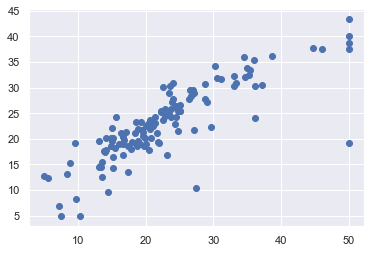

In [364]:
predictions= lm.predict(X1_test)
plt.scatter(y_test,predictions)

In [365]:
from sklearn import metrics

In [367]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.5501998541607316
MSE: 26.823620684593706
RMSE: 5.179152506404277
